In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [179]:
csv_filename = "/home/ravi/dev/human_trust/data/aaai_submission/jmp_training_dataset.csv"
columns_to_plot = ['total training regret']
is_likert = [True, False, False]
split_by = [['manual condition']]
colors = ['C2', 'C3', 'orange', 'grey', 'teal', 'violet', 'blue', 'green', 'red', 'purple']

In [180]:
def stderror(arr):
    return np.std(arr) / np.sqrt(len(arr))
def annotate(ax, data_values, x_values, y_values, color='black'):
    assert len(x_values) == len(y_values) == len(data_values), "x, y, and data must be same length"
    for x, y, value in zip(x_values, y_values, data_values):
        ax.annotate(str(round(value, 2)), xy=(x, y), color=color)

In [181]:
with open(csv_filename, 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    headings = []
    data = []
    for i, row in enumerate(reader):
        if i == 0:
            headings = row
        else:
            data_with_floats = []
            for val in row:
                try:
                    data_with_floats.append(float(val))
                except:
                    data_with_floats.append(val)
            data.append(data_with_floats)
user_id_idx = headings.index('user id')
user_ids = set([row[user_id_idx] for row in data])        

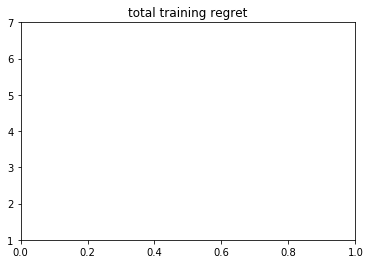

In [182]:
for i, heading in enumerate(columns_to_plot):
    data_idx = headings.index(heading)
    
    if len(split_by) == 1:
        split_headings = split_by[0]
    else:
        split_headings = split_by[i]
    unique_split_values = []
    num_unique_split_values = []
    for split in split_headings:
        split_idx = headings.index(split)
        unique = set(row[split_idx] for row in data)
        unique_split_values.append(sorted(list(unique)))
        num_unique_split_values.append(len(unique))
    heading_split_data = []
    ##########################################################################################
    # CURRENTLY HARD-CODED TO SPLIT ON 1 or 2 AXES
    if len(num_unique_split_values) == 1:
        for _ in range(num_unique_split_values[0]):
            heading_split_data.append([])
    elif len(num_unique_split_values) == 2:
        for _ in range(num_unique_split_values[0]):
            d = []
            for j in range(num_unique_split_values[1]):
                d.append([])
            heading_split_data.append(d)
    ##########################################################################################

    for row in data:
        value = row[data_idx]
        idxs = []
        for j, split in enumerate(split_headings):
            split_heading_idx = headings.index(split)
            split_value = row[split_heading_idx]
            split_value_idx = unique_split_values[j].index(split_value)
            idxs.append(split_value_idx)
        if len(idxs) == 1:
            heading_split_data[idxs[0]].append(value)
        elif len(idxs) == 2:
            heading_split_data[idxs[0]][idxs[1]].append(value)
    heading_split_data = np.array(heading_split_data)
    
    fig, ax = plt.subplots()
    all_data_values = []
    all_x_locs = []
    all_y_locs = []
    if len(idxs) == 1:
        averages = []
        errors = []
        for condition_data in heading_split_data:
            averages.append(np.average(condition_data))
            errors.append(stderror(condition_data))
        print averages, errors
        for j, (average, error) in enumerate(zip(averages, errors)):
            ax.bar(j, average, color=colors[1], yerr=error, label=unique_split_values[0][j])
#         ax.legend(loc='upper right')
        ax.set_xticks(range(len(unique_split_values[0])))
        ax.set_xticklabels(unique_split_values[0])
        all_x_locs.extend(list(range(len(averages))))
        all_y_locs.extend(list(averages))
        all_data_values.extend(list(averages))
    elif len(idxs) == 2:
        y_mins = []
        y_maxes = []
        values_for_bars = np.array([-0.3, -0.1, 0.1, 0.3])
        for j in range(num_unique_split_values[0]):
            all_condition_data = heading_split_data[j]
            averages = []
            errors = []
            for condition_data in all_condition_data:
                averages.append(np.average(condition_data))
                errors.append(stderror(condition_data))
                
            if num_unique_split_values[0] == 4:
                ax.bar(np.arange(len(averages)) + values_for_bars[j], averages, width=0.2, color=colors[j], 
                    yerr=errors, label=unique_split_values[0][j])
                print averages, errors
                all_x_locs.extend(list(np.arange(len(averages)) + values_for_bars[j]))
            else:
                ax.bar(np.arange(len(averages)) - ((-1) ** j * 0.15), averages, width=0.3, color=colors[j], 
                    yerr=errors, label=unique_split_values[0][j])
                print averages, errors
                all_x_locs.extend(list(np.arange(len(averages)) + - ((-1) ** j * 0.15)))
            ax.set_xticks(range(len(averages)))
            ax.set_xticklabels(unique_split_values[1])
            all_y_locs.extend(list(averages))
            all_data_values.extend(list(averages))
            
            values_range = max(np.add(averages, errors)) - min(np.subtract(averages, errors))
            y_max = (0.25 * values_range) + max(averages)
            y_min = max(min(averages) - (0.25 * values_range), 0)
            y_mins.append(y_min)
            y_maxes.append(y_max)
        ax.set_ylim(min(y_mins), max(y_maxes))
        ax.legend(loc='upper right')
    annotate(ax, all_data_values, all_x_locs, all_y_locs)
    if is_likert[i]:
        ax.set_ylim(1, 7)
    ax.set_title(heading)
#     ax.set_title("Influence")
#     plt.savefig('/home/ravi/dev/human_trust/data/aaai_submission/plots/' + heading + '.pdf', 
#                 bbox_inches='tight')
#     plt.savefig('/home/ravi/dev/human_trust/data/aaai_submission/plots/influence_groups.pdf', 
#                 bbox_inches='tight')

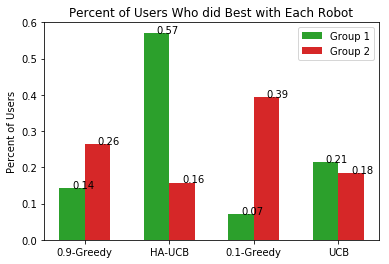

In [33]:
robot_order = ["0.9-Greedy", "HA-UCB", "0.1-Greedy", "UCB"]
# users put into "explore fully then be greedy"
group1_best_robot = [ 0.14285714,  0.57142857,  0.07142857,  0.21428571]
# users put into "explore fully all the way"
group2_best_robot = [ 0.26315789,  0.15789474,  0.39473684,  0.18421053]

fig, ax = plt.subplots()
ax.set_xticks(range(4))
ax.set_xticklabels(robot_order)
ax.bar(np.arange(4)-0.15, group1_best_robot, width=0.3, label="Group 1", color='C2')
ax.bar(np.arange(4)+0.15, group2_best_robot, width=0.3, label="Group 2", color='C3')
annotate(ax, group1_best_robot, np.arange(4)-0.15, group1_best_robot)
annotate(ax, group2_best_robot, np.arange(4)+0.15, group2_best_robot)
ax.legend(loc='upper right')
ax.set_ylabel("Percent of Users")
ax.set_title("Percent of Users Who did Best with Each Robot")
plt.savefig('/home/ravi/dev/human_trust/data/aaai_submission/plots/percent_did_best.pdf', 
                bbox_inches='tight')

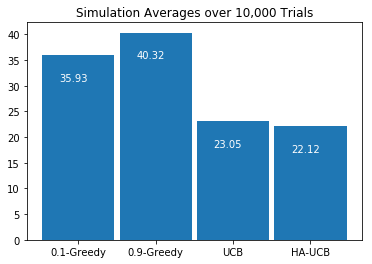

In [80]:
# robot_order = ["0.1-Greedy", "0.3-Greedy", "0.9-Greedy", "UCB", "HA-UCB"]
# simulation_results = [50.95, 54.89, 46.65, 63.96, 65.04]
robot_order = ["0.1-Greedy", "0.9-Greedy", "UCB", "HA-UCB"]
simulation_results = [35.9346, 40.3197, 23.0516, 22.1168]
# regret of absolutely random: 42.5812

fig, ax = plt.subplots()
# bar_locs = [0.15, 0.3, 0.45, 0.6, 0.75]
bar_locs = [0.15, 0.3, 0.45, 0.6]
for i, robot, value in zip(bar_locs, robot_order, simulation_results):
    ax.bar(i, value, width=0.14, color='C0')
# ax.set_xticks([0.15, 0.3, 0.45, 0.6, 0.75])
ax.set_xticks([0.15, 0.3, 0.45, 0.6])
ax.set_xticklabels(robot_order);
# ax.bar([0.15, 0.3, 0.45, 0.6, 0.75], simulation_results, width=0.3)
annotate(ax, simulation_results, np.array(bar_locs) - (0.15/4), np.array(simulation_results)-5, color='white')
ax.set_title("Simulation Averages over 10,000 Trials");
plt.savefig('/home/ravi/dev/human_trust/data/aaai_submission/plots/simulation_results2.pdf', 
                bbox_inches='tight')

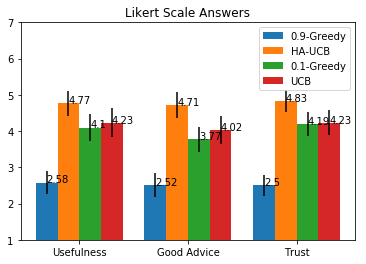

In [720]:
robot_order = ["0.9-Greedy", "HA-UCB", "0.1-Greedy", "UCB"]
usefulness0 = np.array([ 2.80769231,  4.73076923,  3.92307692,  4.15384615])
usefulness1 = np.array([ 2.34615385,  4.80769231,  4.26923077,  4.30769231])
usefulness_errors0 = np.array([0.35258651533565594, 0.34210319002650152, 0.32143850545659342, 0.35953745635416129])
usefulness_errors1 = np.array([0.26614888663847253, 0.33976684822326381, 0.40176272954464137, 0.42749175835244202])
usefulness = (usefulness0 + usefulness1) / 2
usefulness_errors = (usefulness_errors0 + usefulness_errors1) / 2

advice0 = [ 2.57692308,  4.42307692,  3.42307692,  3.65384615]
advice1 = [ 2.46153846,  5.,          4.11538462,  4.38461538]
advice_errors0 = [0.36557920698140189, 0.36557920698140189, 0.31328134000809721, 0.36056459545001718]
advice_errors1 = [0.28383869716476823, 0.34828404377451605, 0.38968551679877844, 0.41451805292883737]
advice = np.add(advice0, advice1) / 2
advice_errors = np.add(advice_errors0, advice_errors1) / 2

trust0 = [ 2.57692308,  4.76923077,  3.84615385,  4.11538462]
trust1 = [ 2.42307692,  4.88461538,  4.53846154,  4.34615385]
trust_errors0 = [0.33163159910342715, 0.30916805864173091, 0.30620944456652338, 0.33673916247029029]
trust_errors1 = [0.23817027449720451, 0.2945607655582822, 0.3450013687939969, 0.36867870464043379]
trust = np.add(trust0, trust1) / 2
trust_errors = np.add(trust_errors0, trust_errors1) / 2

fig, ax = plt.subplots()
ax.bar([0, 0.5, 1.0], [usefulness[0], advice[0], trust[0]], label=robot_order[0],
       yerr=[usefulness_errors[0], advice_errors[0], trust_errors[0]], width=0.1)
ax.bar([0.1, 0.6, 1.1], [usefulness[1], advice[1], trust[1]], label=robot_order[1],
       yerr=[usefulness_errors[1], advice_errors[1], trust_errors[1]], width=0.1)
ax.bar([0.2, 0.7, 1.2], [usefulness[2], advice[2], trust[2]], label=robot_order[2],
       yerr=[usefulness_errors[2], advice_errors[2], trust_errors[2]], width=0.1)
ax.bar([0.3, 0.8, 1.3], [usefulness[3], advice[3], trust[3]], label=robot_order[3],
       yerr=[usefulness_errors[3], advice_errors[3], trust_errors[3]], width=0.1)
ax.set_ylim(1, 7)
ax.legend(loc="upper right");
ax.set_xticks([0.15, 0.65, 1.15]);
ax.set_xticklabels(["Usefulness", "Good Advice", "Trust"]);
ax.set_title("Likert Scale Answers");
for i in range(4):
    annotate(ax, [usefulness[i], advice[i], trust[i]], [0+(0.1*i), 0.5+(0.1*i), 1.0+(0.1*i)], 
             [usefulness[i], advice[i], trust[i]])
plt.savefig('/home/ravi/dev/human_trust/data/aaai_submission/figures/likert_questions.pdf', 
                bbox_inches='tight')

In [121]:
with open(csv_filename, 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    headings = []
    data = []
    for i, row in enumerate(reader):
        if i == 0:
            headings = row
        else:
            data_with_floats = []
            for val in row:
                try:
                    data_with_floats.append(float(val))
                except:
                    data_with_floats.append(val)
            data.append(data_with_floats)
manual_cond_idx = headings.index("manual condition")
robot_idx = headings.index("robot")
total_rew_idx = headings.index("total reward")
rews = []
rews1 = []
rews2 = []
for row in data:
    if row[robot_idx] == "0.9-Greedy" and row[manual_cond_idx] == "Group 2":
        if row[cond_idx] == "collaborate":
            rews1.append(row[total_rew_idx])
        else:
            rews2.append(row[total_rew_idx])
        print row[cond_idx], row[total_rew_idx]
        rews.append(row[total_rew_idx])
print
print np.average(rews)

collaborate 55.0
observe and collaborate 57.0
collaborate 38.0
collaborate 64.0
observe and collaborate 73.0
observe and collaborate 59.0
observe and collaborate 70.0
collaborate 67.0
collaborate 78.0
collaborate 35.0
collaborate 77.0
collaborate 56.0
collaborate 42.0
observe and collaborate 35.0
observe and collaborate 45.0
observe and collaborate 84.0
collaborate 86.0
collaborate 51.0
observe and collaborate 94.0
collaborate 77.0
observe and collaborate 62.0
observe and collaborate 68.0
collaborate 67.0
observe and collaborate 73.0
observe and collaborate 52.0
collaborate 71.0
collaborate 45.0
observe and collaborate 42.0
observe and collaborate 83.0
collaborate 44.0
collaborate 40.0
observe and collaborate 77.0
collaborate 27.0
collaborate 39.0
collaborate 58.0
observe and collaborate 72.0
observe and collaborate 59.0
observe and collaborate 45.0

59.6578947368


In [127]:
all_explore_scores = np.array([
[55, 86, 88, 73],
[57, 52, 73, 48],
[38, 64, 70, 59],
[64, 79, 54, 55],
[73, 30, 61, 74],
[59, 67, 70, 33],
[70, 64, 48, 25], #
[67, 35, 57, 76],
[78, 79, 64, 74], #
[35, 85, 35, 30],
[77, 77, 66, 45], #
[56, 62, 79, 66],
[42, 72, 79, 36],
[35, 46, 63, 57],
[45, 59, 84, 73],
[84, 62, 28, 31], #
[86, 79, 83, 52],
[51, 69, 63, 59],
[94, 85, 47, 38], #
[77, 71, 83, 33],
[62, 33, 45, 48],
[68, 49, 55, 43],
[67, 68, 62, 82], #
[73, 70, 69, 66], #
[52, 42, 45, 52],
[71, 71, 28, 62], #
[45, 39, 65, 62],
[42, 87, 66, 106],#
[83, 86, 90, 53],
[44, 76, 67, 63],
[40, 79, 46, 88], #
[77, 64, 74, 90],
[27, 65, 56, 97], #
[39, 39, 80, 65],
[58, 68, 66, 45],
[72, 91, 92, 67],
[59, 73, 84, 55],
[45, 70, 75, 65]])
print min(all_explore_scores[:,2]), max(all_explore_scores[:,2])
print min(all_explore_scores[:,1]), max(all_explore_scores[:,1])
diffs = all_explore_scores[:,2] - all_explore_scores[:,1]
print diffs
pos = []
neg = []
for i in diffs:
    if i >= 0:
        pos.append(i)
    else:
        neg.append(i)
print len(pos), np.average(pos)
print len(neg), np.average(neg)

28 92
30 91
[  2  21   6 -25  31   3 -16  22 -15 -50 -11  17   7  17  25 -34   4  -6
 -38  12  12   6  -6  -1   3 -43  26 -21   4  -9 -33  10  -9  41  -2   1
  11   5]
22 13.0
16 -19.9375
